In [10]:
import numpy as np
import os
import numpy as np
import matplotlib.pyplot as plt
import pywt
import pywt.data

In [39]:
img=plt.imread('C://Users//antoz//Desktop//Blender  Mennzz//Random Render//x.png')
img2=np.mean(img , -1) #rgb to gray

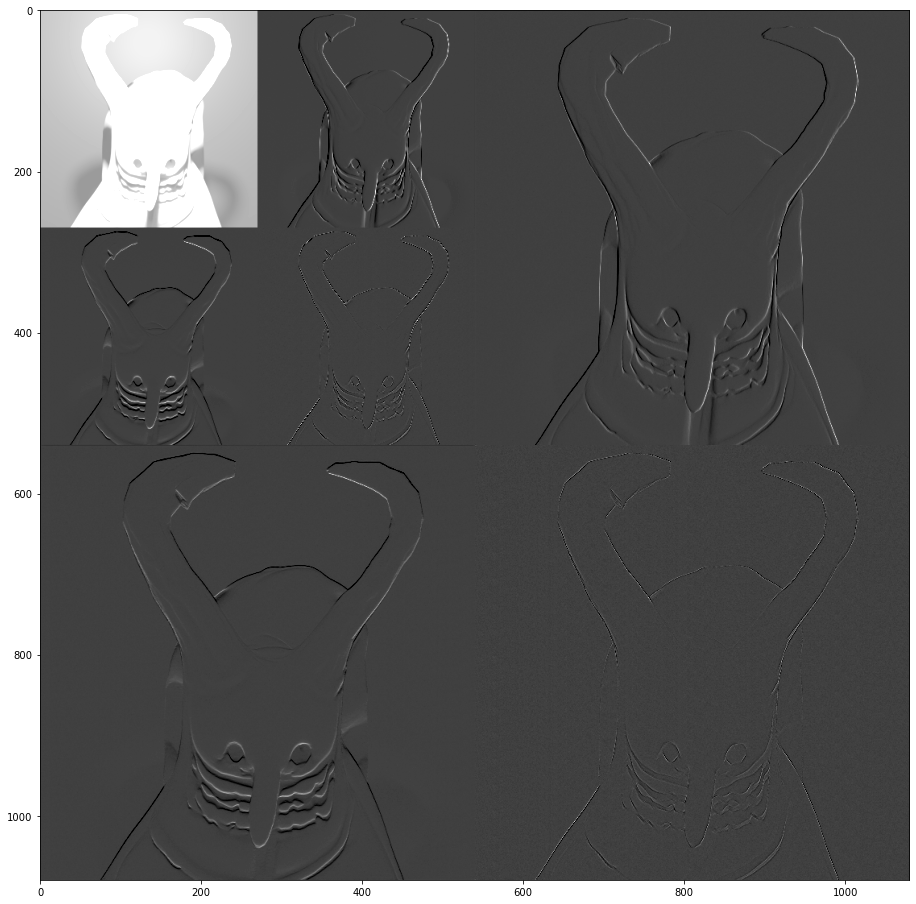

In [37]:
## Wavelet decomposition (2 level)
n = 2
w = 'db1'
coeffs = pywt.wavedec2(img2,wavelet=w,level=n)

# normalize each coefficient array
coeffs[0] /= np.abs(coeffs[0]).max()
for detail_level in range(n):
    coeffs[detail_level + 1] = [d/np.abs(d).max() for d in coeffs[detail_level + 1]]

arr, coeff_slices = pywt.coeffs_to_array(coeffs)


plt.figure(figsize=(18,16))
plt.imshow(arr,cmap='gray',vmin=-0.25,vmax=0.75)
plt.show()

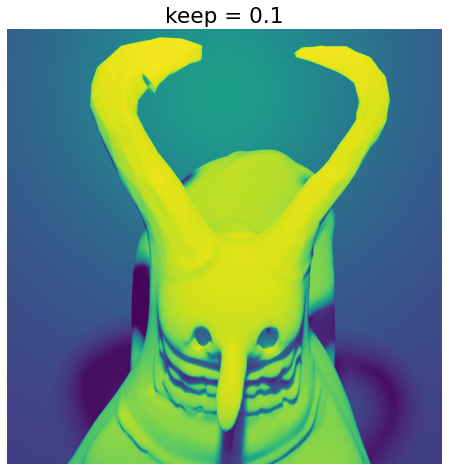

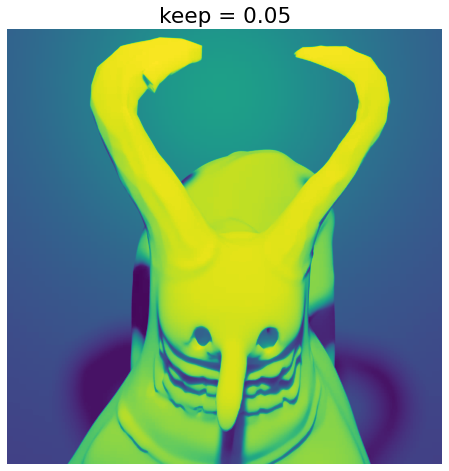

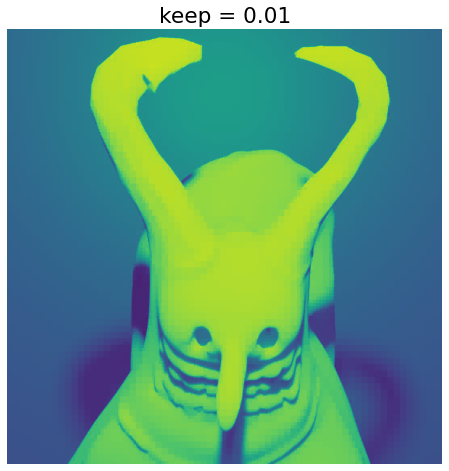

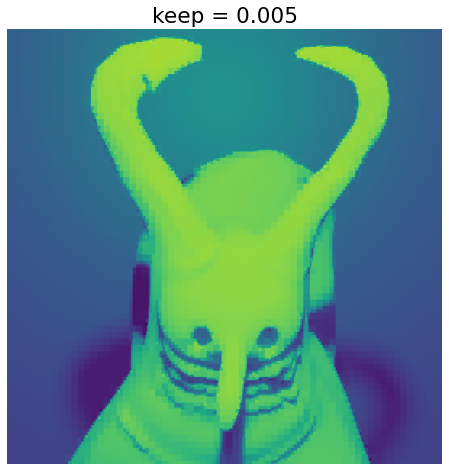

In [45]:
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})

A =plt.imread('C://Users//antoz//Desktop//Blender  Mennzz//Random Render//x.png')
B = np.mean(A, -1); # Convert RGB to grayscale
## Wavelet Compression
n = 4
w = 'db1'
coeffs = pywt.wavedec2(B,wavelet=w,level=n)

coeff_arr, coeff_slices = pywt.coeffs_to_array(coeffs)

Csort = np.sort(np.abs(coeff_arr.reshape(-1)))

for keep in (0.1, 0.05, 0.01, 0.005):
    thresh = Csort[int(np.floor((1-keep)*len(Csort)))]
    ind = np.abs(coeff_arr) > thresh
    Cfilt = coeff_arr * ind # Threshold small indices
    
    coeffs_filt = pywt.array_to_coeffs(Cfilt,coeff_slices,output_format='wavedec2')
    
    # Plot reconstruction
    Arecon = pywt.waverec2(coeffs_filt,wavelet=w)
    plt.figure()
    plt.imshow(Arecon)
    plt.axis('off')
    plt.title('keep = ' + str(keep))